# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
#open weather url 
url="http://api.openweathermap.org/data/2.5/weather?"
units='imperial'

#building query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=7245f4dfc76885494b44798e677a57a7&units=imperial&q='

In [5]:
cities

['ketchikan',
 'poltavka',
 'cape town',
 'hobart',
 'kavieng',
 'poum',
 'pedernales',
 'vila velha',
 'saint anthony',
 'hermanus',
 'xining',
 'ust-ordynskiy',
 'muros',
 'ewa beach',
 'puerto ayora',
 'lompoc',
 'port alfred',
 'bathsheba',
 'busselton',
 'mercedes',
 'upernavik',
 'hambantota',
 'coihaique',
 'tahta',
 'boende',
 'maghama',
 'jamestown',
 'bredasdorp',
 'atuona',
 'port hardy',
 'avarua',
 'chardara',
 'kapaa',
 'lixourion',
 'urumqi',
 'attawapiskat',
 'milanowek',
 'vaini',
 'raudeberg',
 'albany',
 'glogow',
 'chokurdakh',
 'saint-louis',
 'rikitea',
 'iralaya',
 'kodiak',
 'margate',
 'rosa zarate',
 'belushya guba',
 'mataura',
 'vostok',
 'barrow',
 'punta arenas',
 'saskylakh',
 'vanimo',
 'chagda',
 'ribeira grande',
 'new norfolk',
 'hualmay',
 'lorengau',
 'mahebourg',
 'kahului',
 'yerbogachen',
 'pevek',
 'scottsbluff',
 'saldanha',
 'rawlins',
 'ushuaia',
 'hithadhoo',
 'carnarvon',
 'grand river south east',
 'sao filipe',
 'linchuan',
 'baykit',
 'k

In [34]:
#empty lists to be filled
temperature_F=[]
humidity_percentage=[]
cloudiness_percentage=[]
windspeed_mph=[]
latitude=[]
longitude=[]
cityname=[]

for city in cities:
    response= requests.get(query_url +city).json()
    try:
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature_F.append(response['main']['temp'])
        humidity_percentage.append(response['main']['humidity'])
        cloudiness_percentage.append(response['clouds']['all'])
        windspeed_mph.append(response['wind']['speed'])
        cityname.append(response['name'])
        print(f'data processed')
    except KeyError:
        print('City not found. Skipping')

data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
City not found. Skipping
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
City not found. Skipping
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
City not found. Skipping
data processed
data processed
data processed
data processed
data processed
data processed
City not found. Skipping
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed


data processed
data processed
data processed
City not found. Skipping
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
City not found. Skipping
data processed
data processed
data processed
data processed
data processed
data processed
data processed
City not found. Skipping
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
data processed
City not found. Skipping
data processed
data processed
data processed
data processed


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [1]:
citydata=pd.DataFrame({'cityname': cityname,
                        'latitude':latitude,
                       'longitude':longitude,
                      'temperature_F':temperature_F,
                      'humidity_percentage':humidity_percentage,
                      'cloudiness_percentage':cloudiness_percentage,
                      'windspeed_mph':windspeed_mph,
                      })

citydata.to_csv('../output_HW/citydata.csv')

NameError: name 'pd' is not defined

In [2]:
citydata


NameError: name 'citydata' is not defined

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
citydata.describe()

,latitude,longitude,temperature_F,humidity_percentage,cloudiness_percentage,windspeed_mph
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,22.156577,19.993471,57.676655,74.429809,58.268631,7.451837
std,33.351459,90.870689,21.405984,19.281243,38.873043,5.546781
min,-54.800000,-179.166700,-17.640000,11.000000,0.000000,0.000000
25%,-3.416700,-58.650200,42.750000,65.000000,19.000000,3.310000
50%,27.866700,25.570100,61.830000,79.000000,74.000000,5.880000
75%,51.381300,98.779200,75.690000,89.000000,96.000000,10.360000
max,78.218600,179.316700,92.120000,100.000000,100.000000,31.290000


In [51]:
#  Get the indices of cities that have humidity over 100%.
citydata.loc[citydata['humidity_percentage']>100]

,cityname,latitude,longitude,temperature_F,humidity_percentage,cloudiness_percentage,windspeed_mph


In [52]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'City Latitude vs. Max Temperature'}, xlabel='Latitude', ylabel='Max Temperature (f)'>

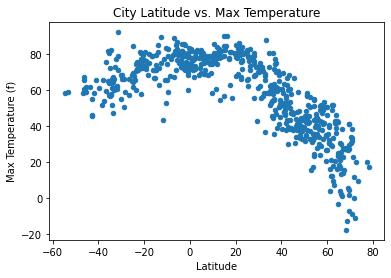

In [53]:
citydata.plot.scatter('latitude','temperature_F', title= 'City Latitude vs. Max Temperature',
                      xlabel='Latitude', ylabel='Max Temperature (f)')

## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'City Latitude vs. Humidity'}, xlabel='Latitude', ylabel='Humidity'>

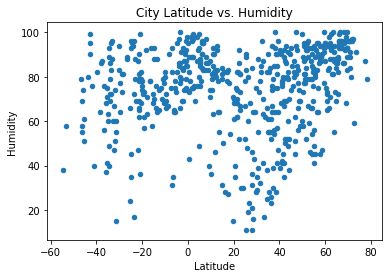

In [37]:
citydata.plot.scatter('latitude','humidity_percentage', title= 'City Latitude vs. Humidity',
                      xlabel='Latitude', ylabel='Humidity')

## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'City Latitude vs. Cloudiness'}, xlabel='Latitude', ylabel='Cloudiness'>

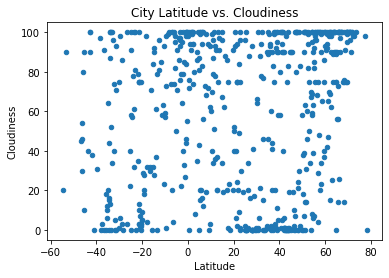

In [38]:
citydata.plot.scatter('latitude','cloudiness_percentage', title= 'City Latitude vs. Cloudiness',
                      xlabel='Latitude', ylabel='Cloudiness')

## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'City Latitude vs. Windspeed mph'}, xlabel='Latitude', ylabel='Windspeed mph'>

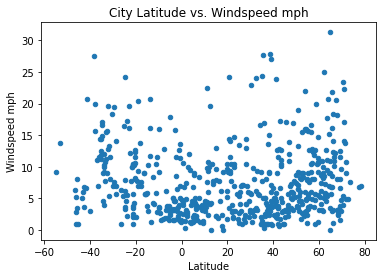

In [39]:
citydata.plot.scatter('latitude','windspeed_mph', title= 'City Latitude vs. Windspeed mph',
                      xlabel='Latitude', ylabel='Windspeed mph')

## Linear Regression

In [54]:
southernhemisphere=citydata.loc[citydata['latitude']<0]
southernhemisphere

,cityname,latitude,longitude,temperature_F,humidity_percentage,cloudiness_percentage,windspeed_mph
2,Cape Town,-33.9258,18.4232,61.34,69,13,4.00
3,Hobart,-42.8794,147.3294,46.13,95,90,5.99
4,Kavieng,-2.5744,150.7967,85.32,69,64,8.52
5,Poum,-20.2333,164.0167,76.64,76,5,10.67
7,Vila Velha,-20.3297,-40.2925,76.95,78,75,8.05
...,...,...,...,...,...,...,...
569,Bagé,-31.3314,-54.1069,71.38,60,0,11.50
571,Guaramirim,-26.4731,-49.0028,66.43,89,100,0.89
573,Masuguru,-11.3667,38.4167,77.11,70,58,5.88
574,Samarai,-10.6167,150.6667,83.59,77,23,11.54


In [55]:
citydata

,cityname,latitude,longitude,temperature_F,humidity_percentage,cloudiness_percentage,windspeed_mph
0,Ketchikan,55.3422,-131.6461,43.27,81,75,5.75
1,Poltavka,54.3663,71.7632,35.51,54,59,15.84
2,Cape Town,-33.9258,18.4232,61.34,69,13,4.00
3,Hobart,-42.8794,147.3294,46.13,95,90,5.99
4,Kavieng,-2.5744,150.7967,85.32,69,64,8.52
...,...,...,...,...,...,...,...
572,Prescott,34.5400,-112.4685,72.99,25,1,1.01
573,Masuguru,-11.3667,38.4167,77.11,70,58,5.88
574,Samarai,-10.6167,150.6667,83.59,77,23,11.54
575,Bridlington,54.0831,-0.1919,55.15,79,100,21.94


In [56]:
northernhemisphere=citydata.loc[citydata['latitude']>0]
northernhemisphere

,cityname,latitude,longitude,temperature_F,humidity_percentage,cloudiness_percentage,windspeed_mph
0,Ketchikan,55.3422,-131.6461,43.27,81,75,5.75
1,Poltavka,54.3663,71.7632,35.51,54,59,15.84
6,Pedernales,18.0384,-71.7440,81.25,77,23,9.24
8,Saint Anthony,45.0205,-93.2180,46.99,93,90,1.99
10,Xining,36.6167,101.7667,35.35,76,41,2.13
...,...,...,...,...,...,...,...
566,Buraidah,26.3260,43.9750,73.27,19,34,7.14
568,Mersing,2.4312,103.8405,77.74,89,94,2.53
570,Nagato,34.3833,131.2000,58.19,66,2,16.64
572,Prescott,34.5400,-112.4685,72.99,25,1,1.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

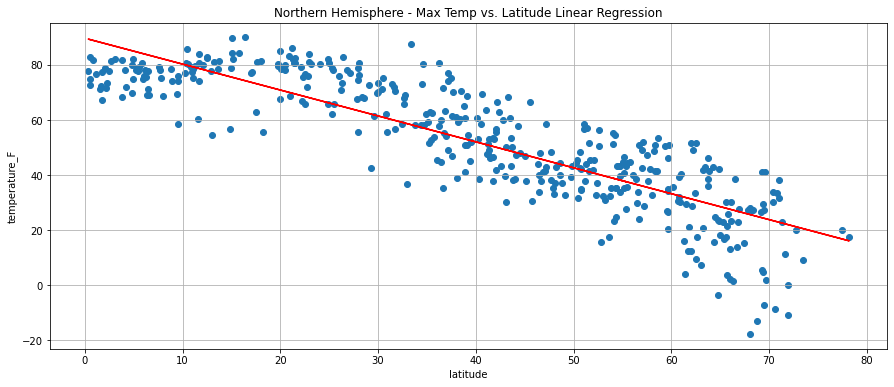

In [58]:
x_values=northernhemisphere['latitude']
y_values=northernhemisphere['temperature_F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=[15,6])
plt.scatter(x_values,y_values)  
plt.plot(x_values,regress_values,c='red')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('latitude')
plt.ylabel('temperature_F')
plt.grid()
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

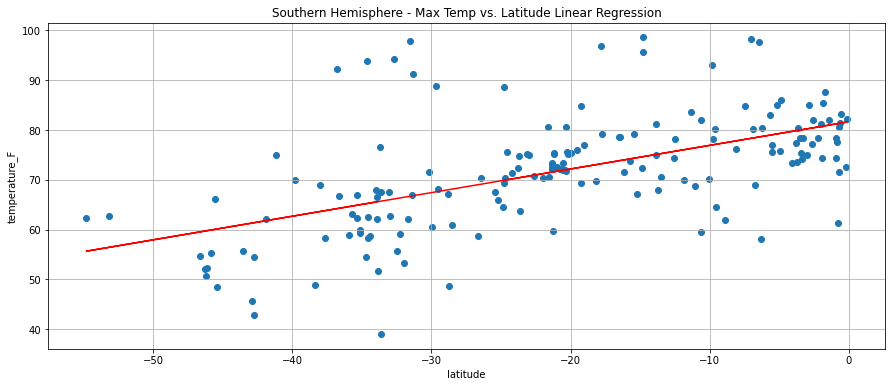

In [43]:

x_values=southernhemisphere['latitude']
y_values=southernhemisphere['temperature_F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=[15,6])
plt.scatter(x_values,y_values)  
plt.plot(x_values,regress_values,c='red')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('latitude')
plt.ylabel('temperature_F')
plt.grid()
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

Looking at the 2 regressions above you can see that as you get closer to the equater it get warmer. This can been seen from the negative slope fo the regestion line that as is gets moves away from 0 it be comes colder. In contast the second graph has a positive slope. This means as we get closer to 0 it gets warmer. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

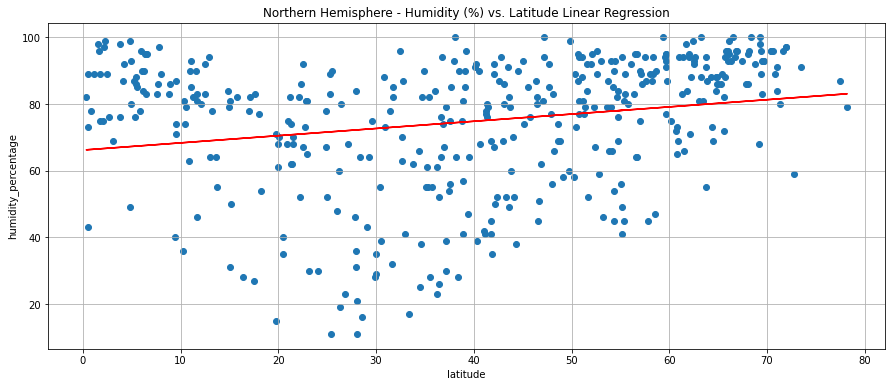

In [59]:
x_values=northernhemisphere['latitude']
y_values=northernhemisphere['humidity_percentage']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=[15,6])
plt.scatter(x_values,y_values)  
plt.plot(x_values,regress_values,c='red')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('latitude')
plt.ylabel('humidity_percentage')
plt.grid()
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

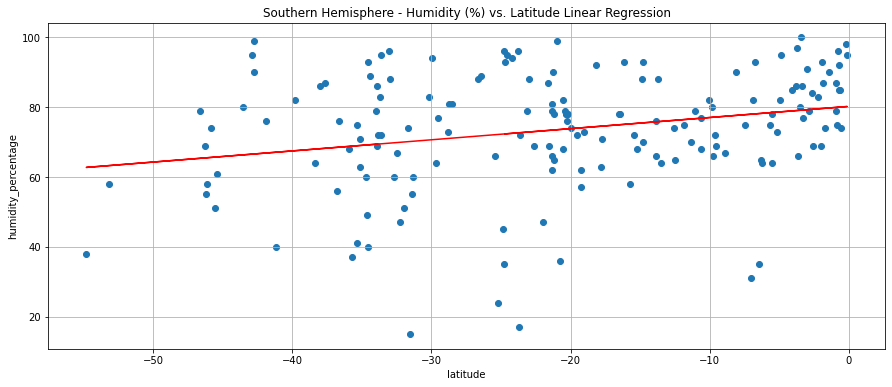

In [60]:

x_values=southernhemisphere['latitude']
y_values=southernhemisphere['humidity_percentage']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=[15,6])
plt.scatter(x_values,y_values)  
plt.plot(x_values,regress_values,c='red')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('latitude')
plt.ylabel('humidity_percentage')
plt.grid()
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

Form looking at the 2 graphs above we can see that you move north it becomes more humid. This can been by the fact that both graphs have positive slope. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

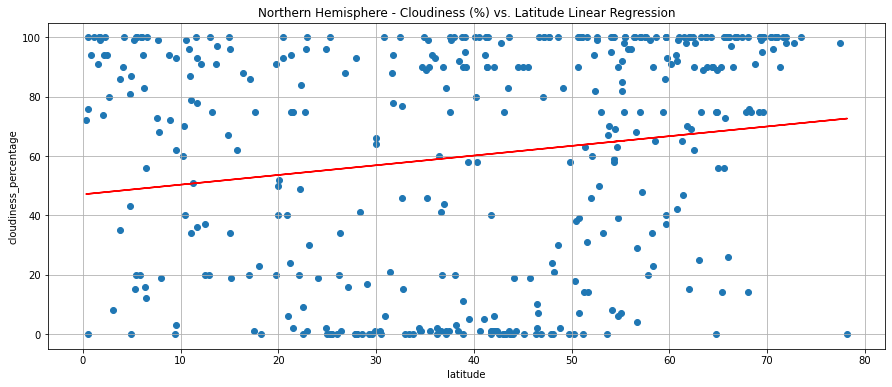

In [61]:
x_values=northernhemisphere['latitude']
y_values=northernhemisphere['cloudiness_percentage']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=[15,6])
plt.scatter(x_values,y_values)  
plt.plot(x_values,regress_values,c='red')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('latitude')
plt.ylabel('cloudiness_percentage')
plt.grid()
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

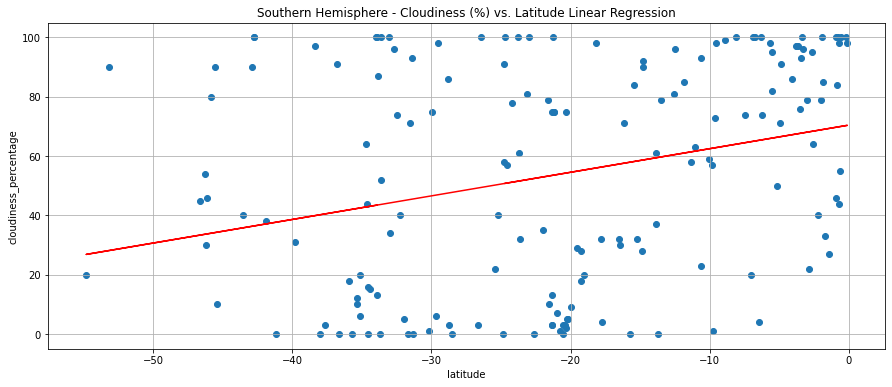

In [62]:
x_values=southernhemisphere['latitude']
y_values=southernhemisphere['cloudiness_percentage']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=[15,6])
plt.scatter(x_values,y_values)  
plt.plot(x_values,regress_values,c='red')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('latitude')
plt.ylabel('cloudiness_percentage')
plt.grid()
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

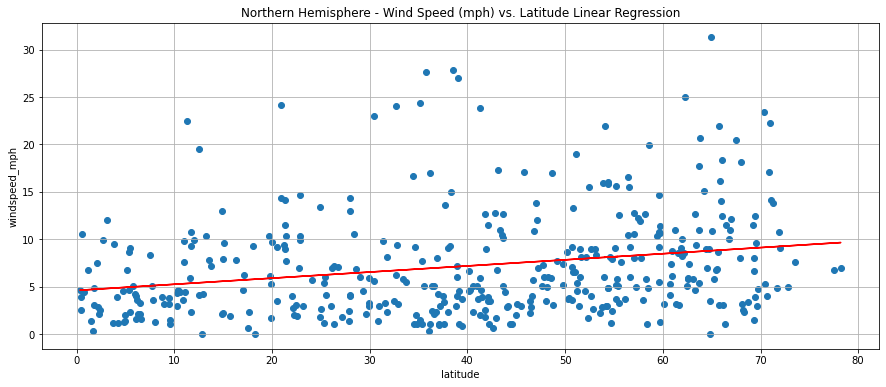

In [63]:
x_values=northernhemisphere['latitude']
y_values=northernhemisphere['windspeed_mph']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=[15,6])
plt.scatter(x_values,y_values)  
plt.plot(x_values,regress_values,c='red')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('latitude')
plt.ylabel('windspeed_mph')
plt.grid()
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

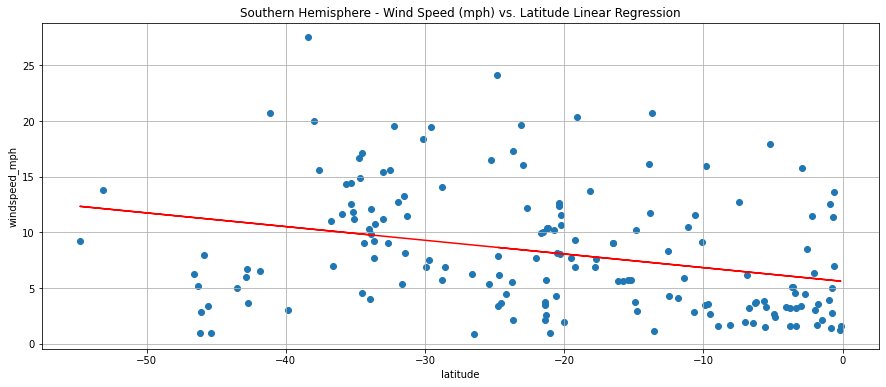

In [64]:
x_values=southernhemisphere['latitude']
y_values=southernhemisphere['windspeed_mph']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=[15,6])
plt.scatter(x_values,y_values)  
plt.plot(x_values,regress_values,c='red')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('latitude')
plt.ylabel('windspeed_mph')
plt.grid()
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')
plt.show()

By looking at the 2 graphs above we can see that as you move away from the equater it becomes less windy. this can be understood from looking at the slope of the 2 graphs. In the first one you can see the slop is possivitve and the second graph the slope is negative. 